## Module imports

In [12]:
from __future__ import print_function, division
import sys
import numpy as np
from Bio import Phylo
import os
import datetime

In [13]:
from treetime import TreeTime
from treetime.utils import parse_dates
import treetime.config as ttconf

In [141]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker
try:
    import seaborn as sns
    sns.set_style('whitegrid')
except:
    print ("Seaborn not found. Default style will be used for the plots")
import pandas as pd
from scipy import stats

## Setup input file paths

In [9]:
meta_path = "../Assembly_Modern/nextstrain/metadata_nextstrain_geocode_state.tsv"
tree_path = "../Assembly_Modern/iqtree/iqtree.core-filter0_bootstrap.treefile"
aln_path = "../Assembly_Modern/snippy_multi/snippy-core.full_CHROM.filter0.fasta"

## Parse the dates

In [2]:
dates = parse_dates(date_file=meta_path, date_col="BioSampleCollectionDate")

NameError: name 'parse_dates' is not defined

## Treetime clock analysis

In [10]:
tt_relaxed = TreeTime(tree = tree_path,
                      aln = aln_path,
                      verbose = 4,
                      dates = dates)


0.00	-TreeAnc: set-up

63.61	-SequenceData: loaded alignment.

63.61	-SeqData: making compressed alignment...

173.69	-SequenceData: constructed compressed alignment...
195.13	--ClockTree: Setting precision to level 2

195.15	-ClockTree._assign_dates: assigned date contraints to 476 out of 476
      	 tips.


In [14]:
tt_relaxed.run(branch_length_mode = "input", # Don't optimize branch lengths
               n_iqd=3,
               root=None,
               infer_gtr=True,
               resolve_polytomies=False,
               relaxed_clock={"slack":1.0, "coupling":0.0},
               max_iter=3,
               Tc="skyline",
               use_covariation=False, # covariation is only for strict molecular clock
               time_marginal=True # Enable final round for error bar estimation,
              )


262.82	-TreeAnc.infer_ancestral_sequences with method: probabilistic, joint

262.82	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences
      	of tips at positions with AMBIGUOUS bases. This resulted in unexpected
      	behavior is some cases and is no longer done by default. If you want to
      	replace those ambiguous sites with their most likely state, rerun with
      	`reconstruct_tip_states=True` or `--reconstruct-tip-states`.
262.82	--TreeAnc._ml_anc_joint: type of reconstruction: Joint
262.82	---TreeAnc._ml_anc_joint: Walking up the tree, computing likelihoods...
264.03	---TreeAnc._ml_anc_joint: Walking down the tree, computing maximum
      	   likelihood sequences...
264.07	---TreeAnc._ml_anc_joint: ...done
264.08	--TreeAnc.infer_gtr: counting mutations...
271.12	---TreeAnc.infer_gtr: counting mutations...done

271.12	-GTR: with alphabet: ['A', 'C', 'G', 'T', '-']
271.12	--GTR: ambiguous character: N
271.12	---GTR: init with dummy values!

271.12	-GTR: 

301.74	--ClockTree - Joint reconstruction:  Propagating root -> leaves...
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
      	    optimized later than present day
301.85	----ClockTree.convert_dates -- WARNING: node which is marked as "BAD"
  

370.07	---TreeAnc._ml_anc_joint: Walking down the tree, computing maximum
      	   likelihood sequences...
370.08	---TreeAnc._ml_anc_joint: ...done

370.15	###TreeTime.run: FINAL ROUND - confidence estimation via marginal
      	reconstruction

370.15	-ClockTree: Maximum likelihood tree optimization with temporal
      	 constraints
370.15	--ClockTree.init_date_constraints...
370.15	---ClockTree.init_date_constraints: Initializing branch length
      	   interpolation objects...
371.05	--ClockTree.date2dist: Setting new molecular clock. rate=4.348e-08,
      	  R^2=0.0035
371.05	----ClockTree.init_date_constraints -- WARNING: Branch is marked as bad,
      	    excluding it from the optimization process. Date constraint will be
      	    ignored!
371.05	----ClockTree.init_date_constraints -- WARNING: Branch is marked as bad,
      	    excluding it from the optimization process. Date constraint will be
      	    ignored!
371.05	----ClockTree.init_date_constraints -- WARNING: Branch 

'success'

## Plotting: root-to-tip distance vs. time 

### Setup data frame

In [30]:
full_dist2root = []
full_date = []
outgroup_list = ["GCA_000323485.1_ASM32348v1_genomic",
                 "GCA_000323845.1_ASM32384v1_genomic"]

full_dist2root = []
full_date = []

for n in tt_relaxed.tree.get_terminals():
  # Exclude outgroup
  if n.name not in outgroup_list:
    full_dist2root.append(n.dist2root)
    full_date.append(n.date)

df = pd.DataFrame({
                  "dist2root" : full_dist2root,
                  "date": full_date
                 })


df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())

### Simple scatterplot

In [1]:
plt.figure()
points = plt.scatter(x=df['date_ordinal'], 
                    y=df['dist2root'])

plt.show()

NameError: name 'plt' is not defined

## Add Pearson R2

0.0214479784392474


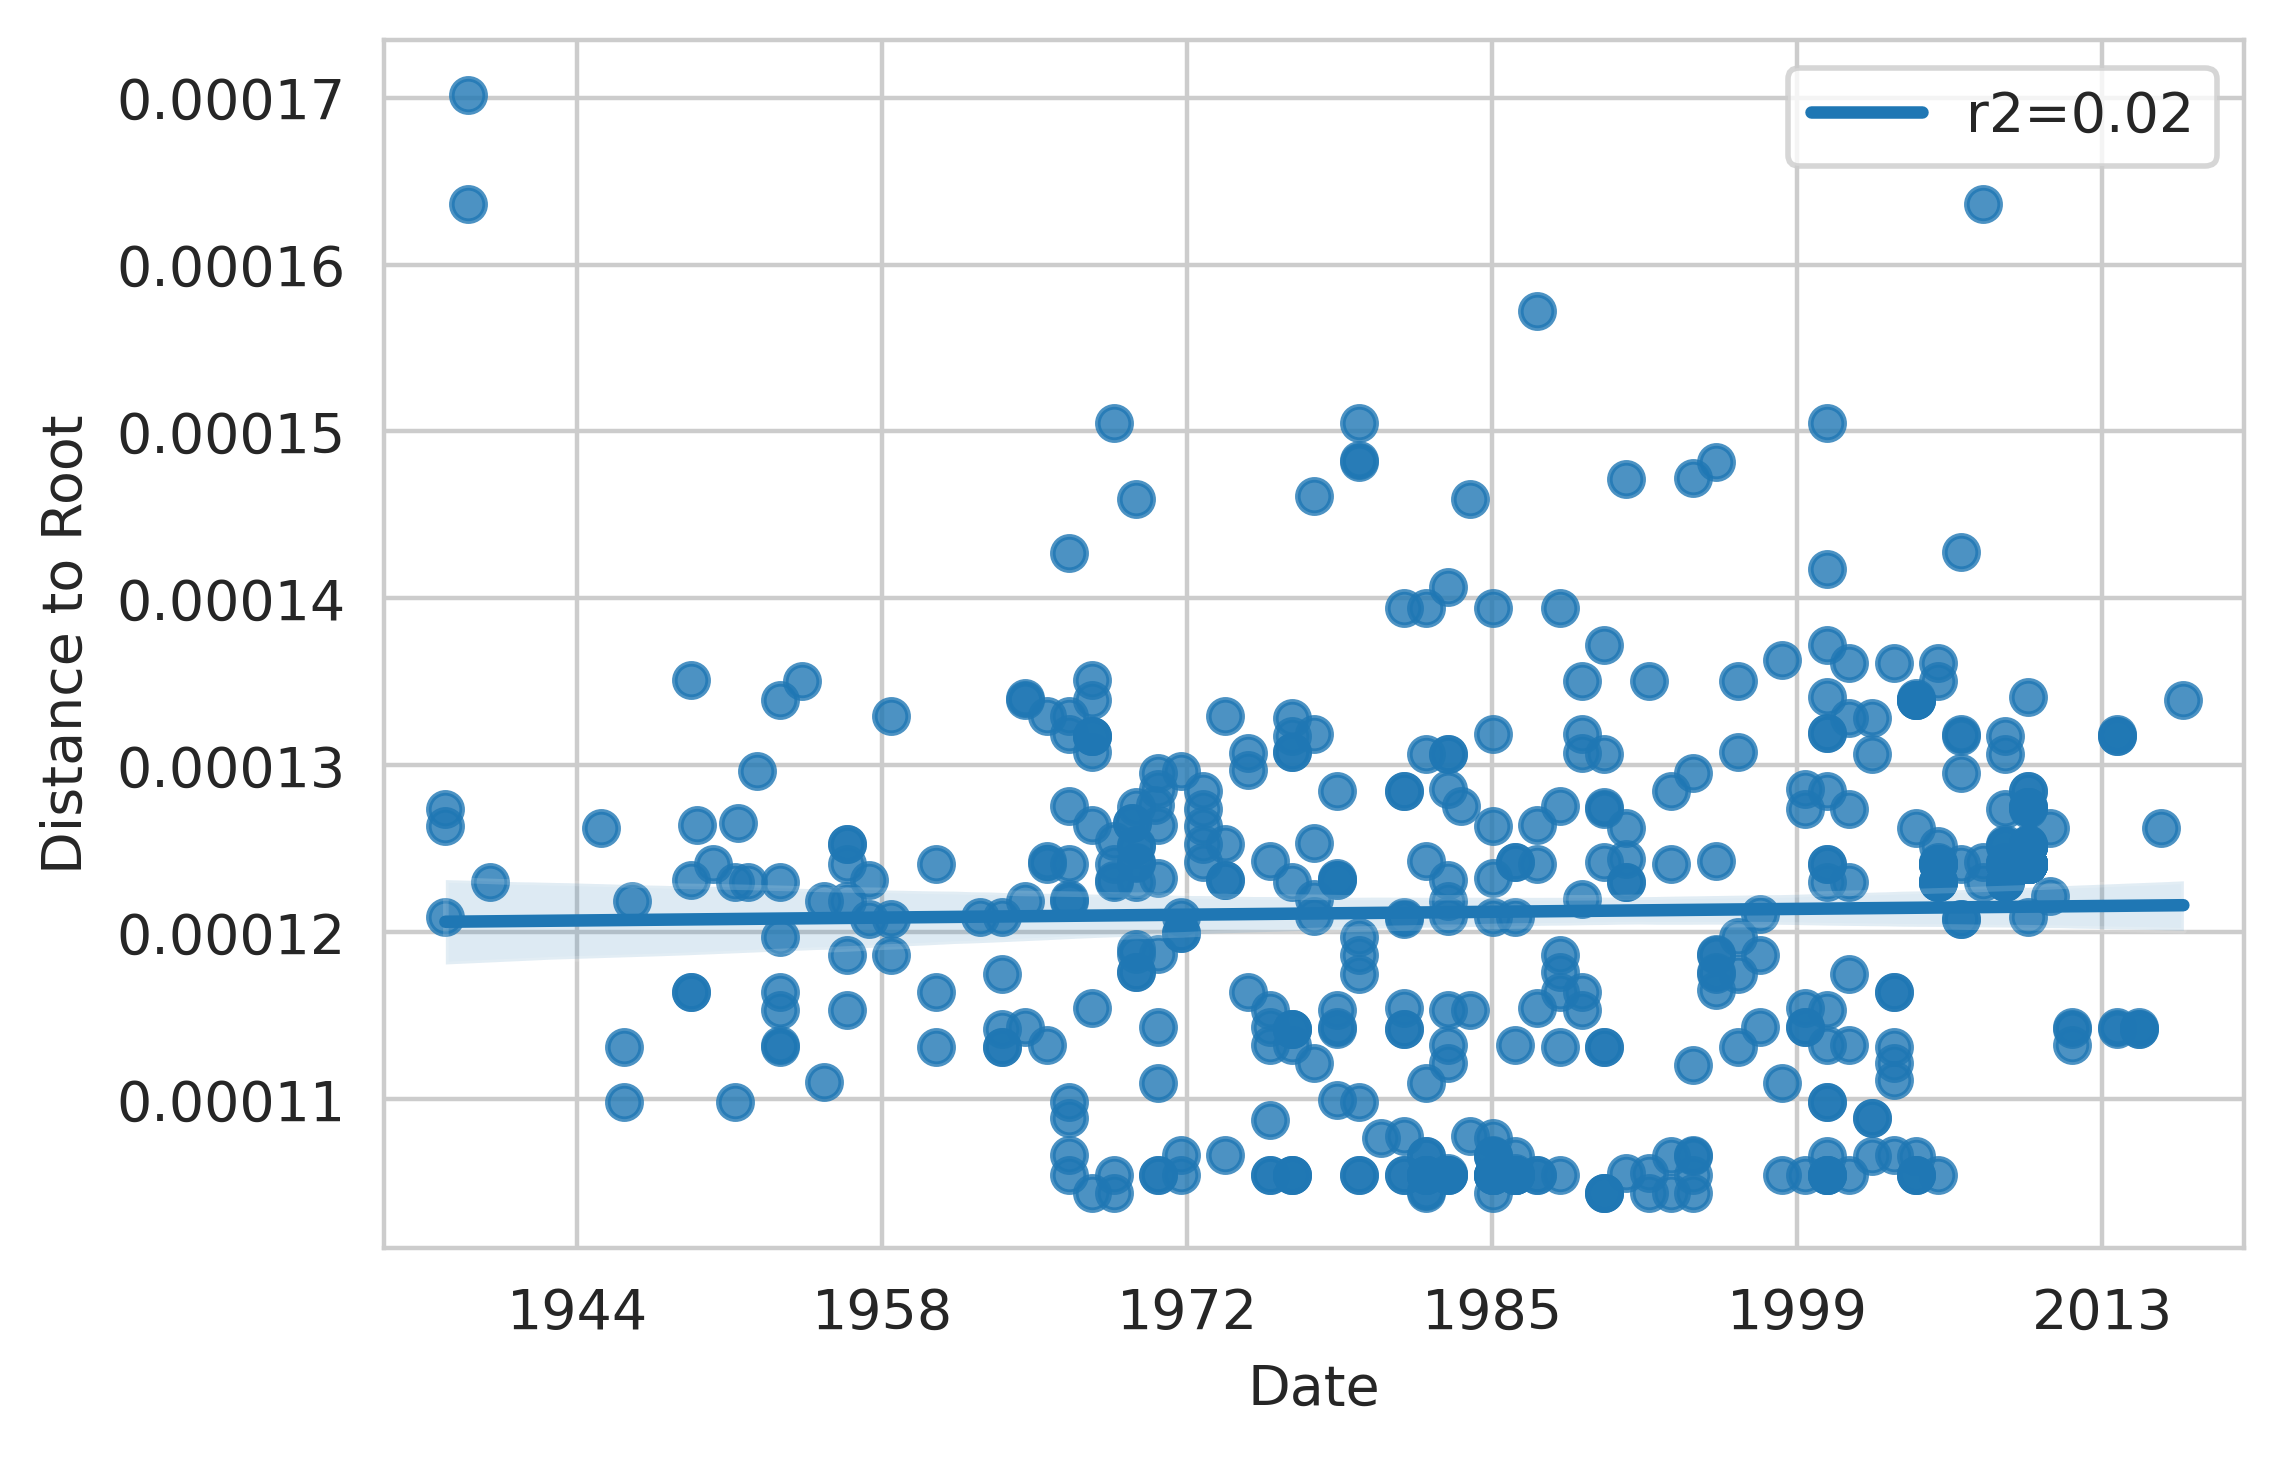

In [187]:
plt.figure(dpi=400)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['date_ordinal'],df['dist2root'])
print(r_value)
ax = sns.regplot(x="date_ordinal",
                       y="dist2root",
                       data=df,
                       ci=90,
                       line_kws={'label':"r2={0:.2f}".format(r_value)})
                       #line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

ax.set_xlim(df['date_ordinal'].min() - 1000, df['date_ordinal'].max() + 1000)
#ax.set_ylim(0, df['dist2root'].max() + 1)
ax.set_xlabel('Date')
ax.set_ylabel('Distance to Root')
new_labels = [datetime.date.fromordinal(int(item)).year for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.00001))
# plot legend
ax.legend()

plt.show()

/home/ktmeaton/miniconda3/envs/nextstrain-8.0.0/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


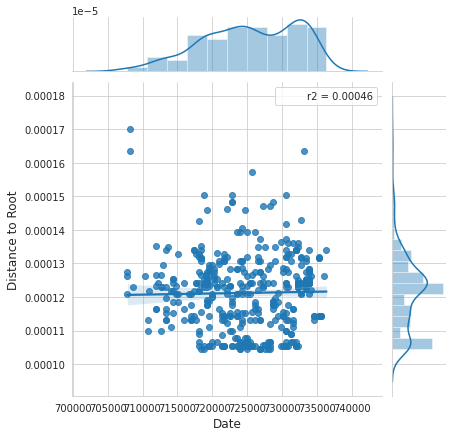

In [146]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
p = sns.jointplot(df['date_ordinal'], df['dist2root'], kind="reg", stat_func=r2)
p.set_axis_labels('Date', 'Distance to Root', fontsize=12)
p.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(0.00001))
#new_labels = [datetime.date.fromordinal(int(item)).year for item in p.ax_joint.get_xticks()]
#new_labels = [2000,2020]
#p.ax_joint.set_xticks(new_labels)

In [79]:
index = pd.date_range("1 1 2000", periods=100,
                      freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
data
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
wide_df
#ax = sns.lineplot(data=wide_df)

,a,b,c,d
date,,,,
2000-01-31,1.060672,1.212381,0.165944,-0.759045
2000-02-29,0.185535,-0.600666,1.638812,-1.360325
2000-03-31,0.037328,-0.837719,1.212468,-0.304093
2000-04-30,-0.420748,0.131263,1.698605,-1.161436
2000-05-31,-1.116063,-0.092842,2.714317,1.146312
...,...,...,...,...
2007-12-31,-10.554151,-14.429430,-6.607217,1.945454
2008-01-31,-11.873897,-14.742955,-8.735971,2.222708
2008-02-29,-11.899387,-12.890734,-8.647064,2.882844
